In [1]:
#Importing the Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv')
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [3]:
df.shape

(158, 12)

In [4]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [5]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [6]:
df.columns.tolist() 

['Country',
 'Region',
 'Happiness Rank',
 'Happiness Score',
 'Standard Error',
 'Economy (GDP per Capita)',
 'Family',
 'Health (Life Expectancy)',
 'Freedom',
 'Trust (Government Corruption)',
 'Generosity',
 'Dystopia Residual']

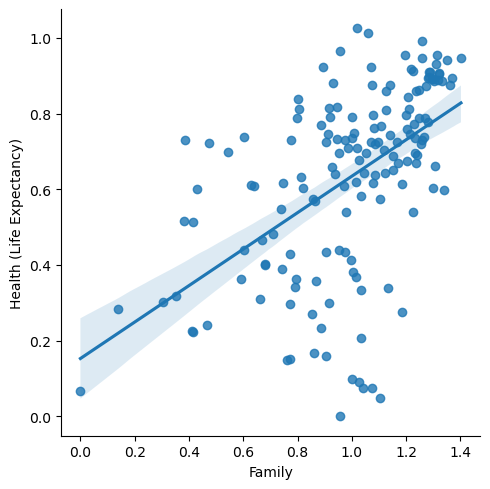

In [7]:
sns.lmplot(x="Family", y = 'Health (Life Expectancy)', data = df)

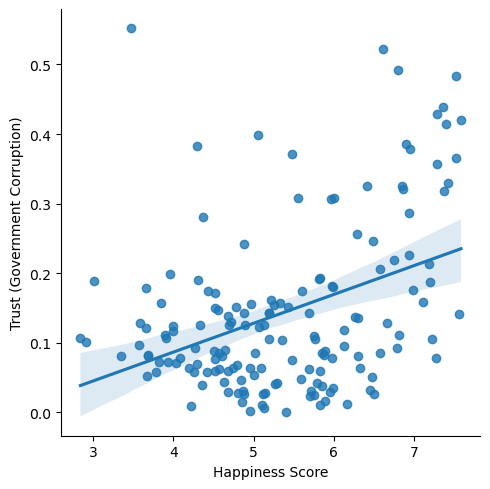

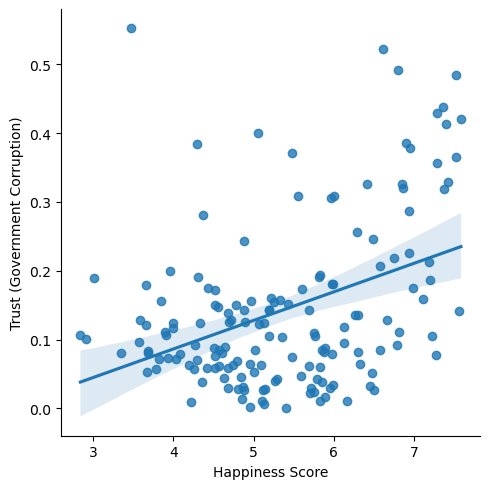

In [9]:
sns.lmplot(x="Happiness Score", y = 'Trust (Government Corruption)', data = df)
plt.show()

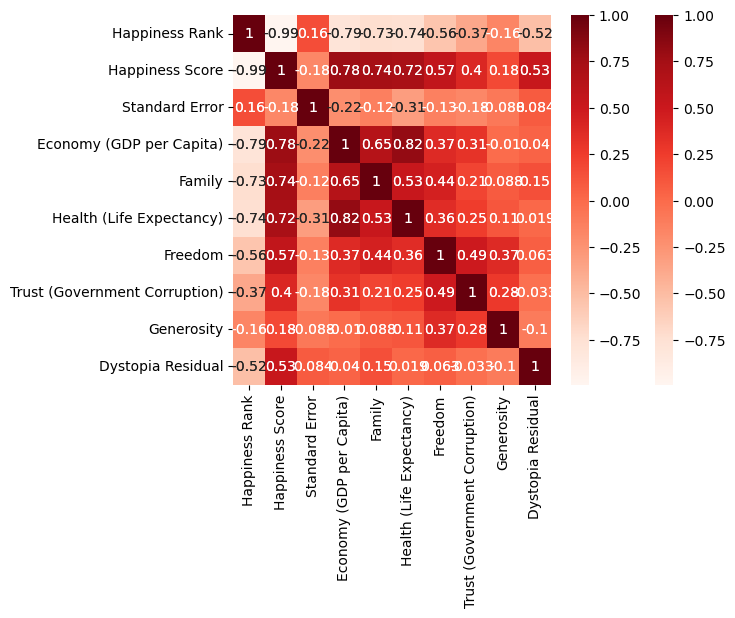

In [11]:
sns.heatmap(df.corr(), cmap='Reds',annot=True)
plt.show()

In [12]:
df.groupby(['Country']).max()['Happiness Score']

Country
Afghanistan    3.575
Albania        4.959
Algeria        5.605
Angola         4.033
Argentina      6.574
               ...  
Venezuela      6.810
Vietnam        5.360
Yemen          4.077
Zambia         5.129
Zimbabwe       4.610
Name: Happiness Score, Length: 158, dtype: float64

In [13]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


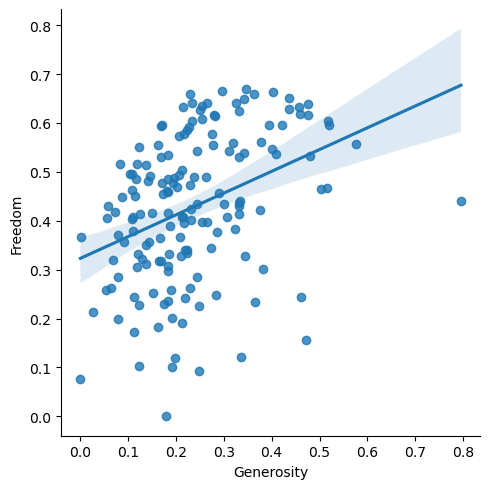

In [14]:
sns.lmplot(x="Generosity", y = 'Freedom', data = df)
plt.show()

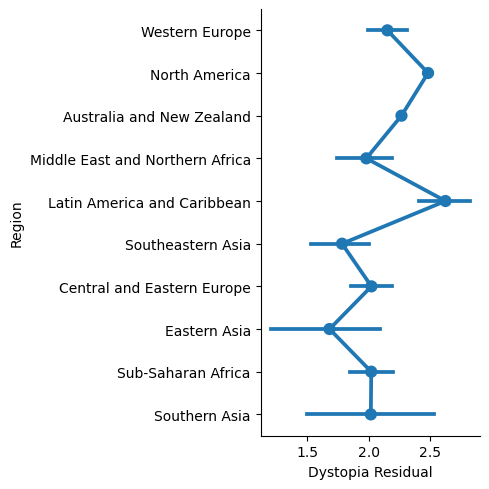

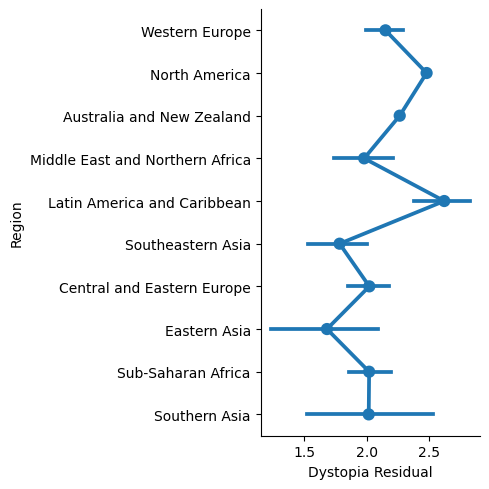

In [16]:
sns.factorplot(x='Dystopia Residual',
               y= 'Region',
               data=df)
plt.show()

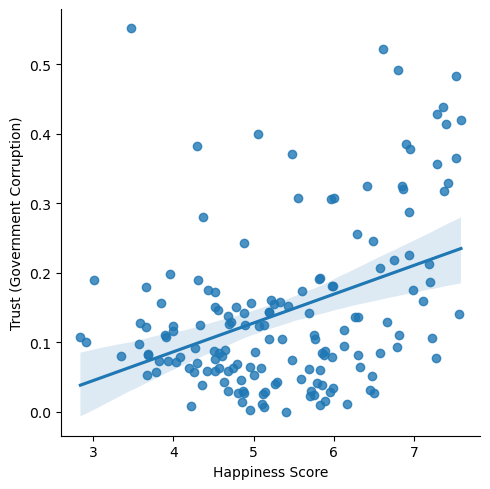

In [17]:
sns.lmplot(x="Happiness Score", y = 'Trust (Government Corruption)', data = df)
plt.show()

In [9]:
df.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [19]:
df.shape

(158, 12)

In [25]:
data = df.drop(['Country','Region'],axis = 1)

<Figure size 2000x1500 with 0 Axes>

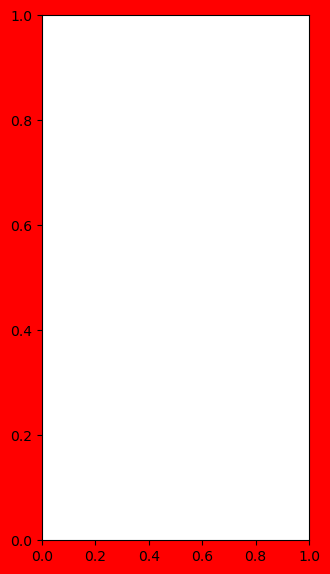

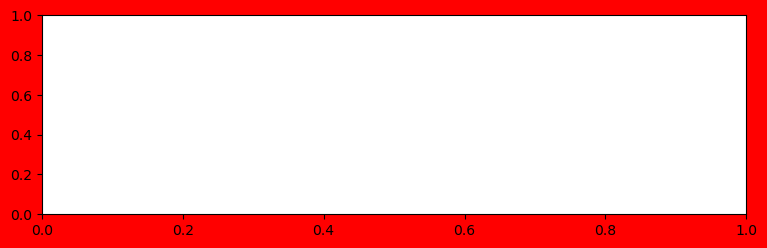

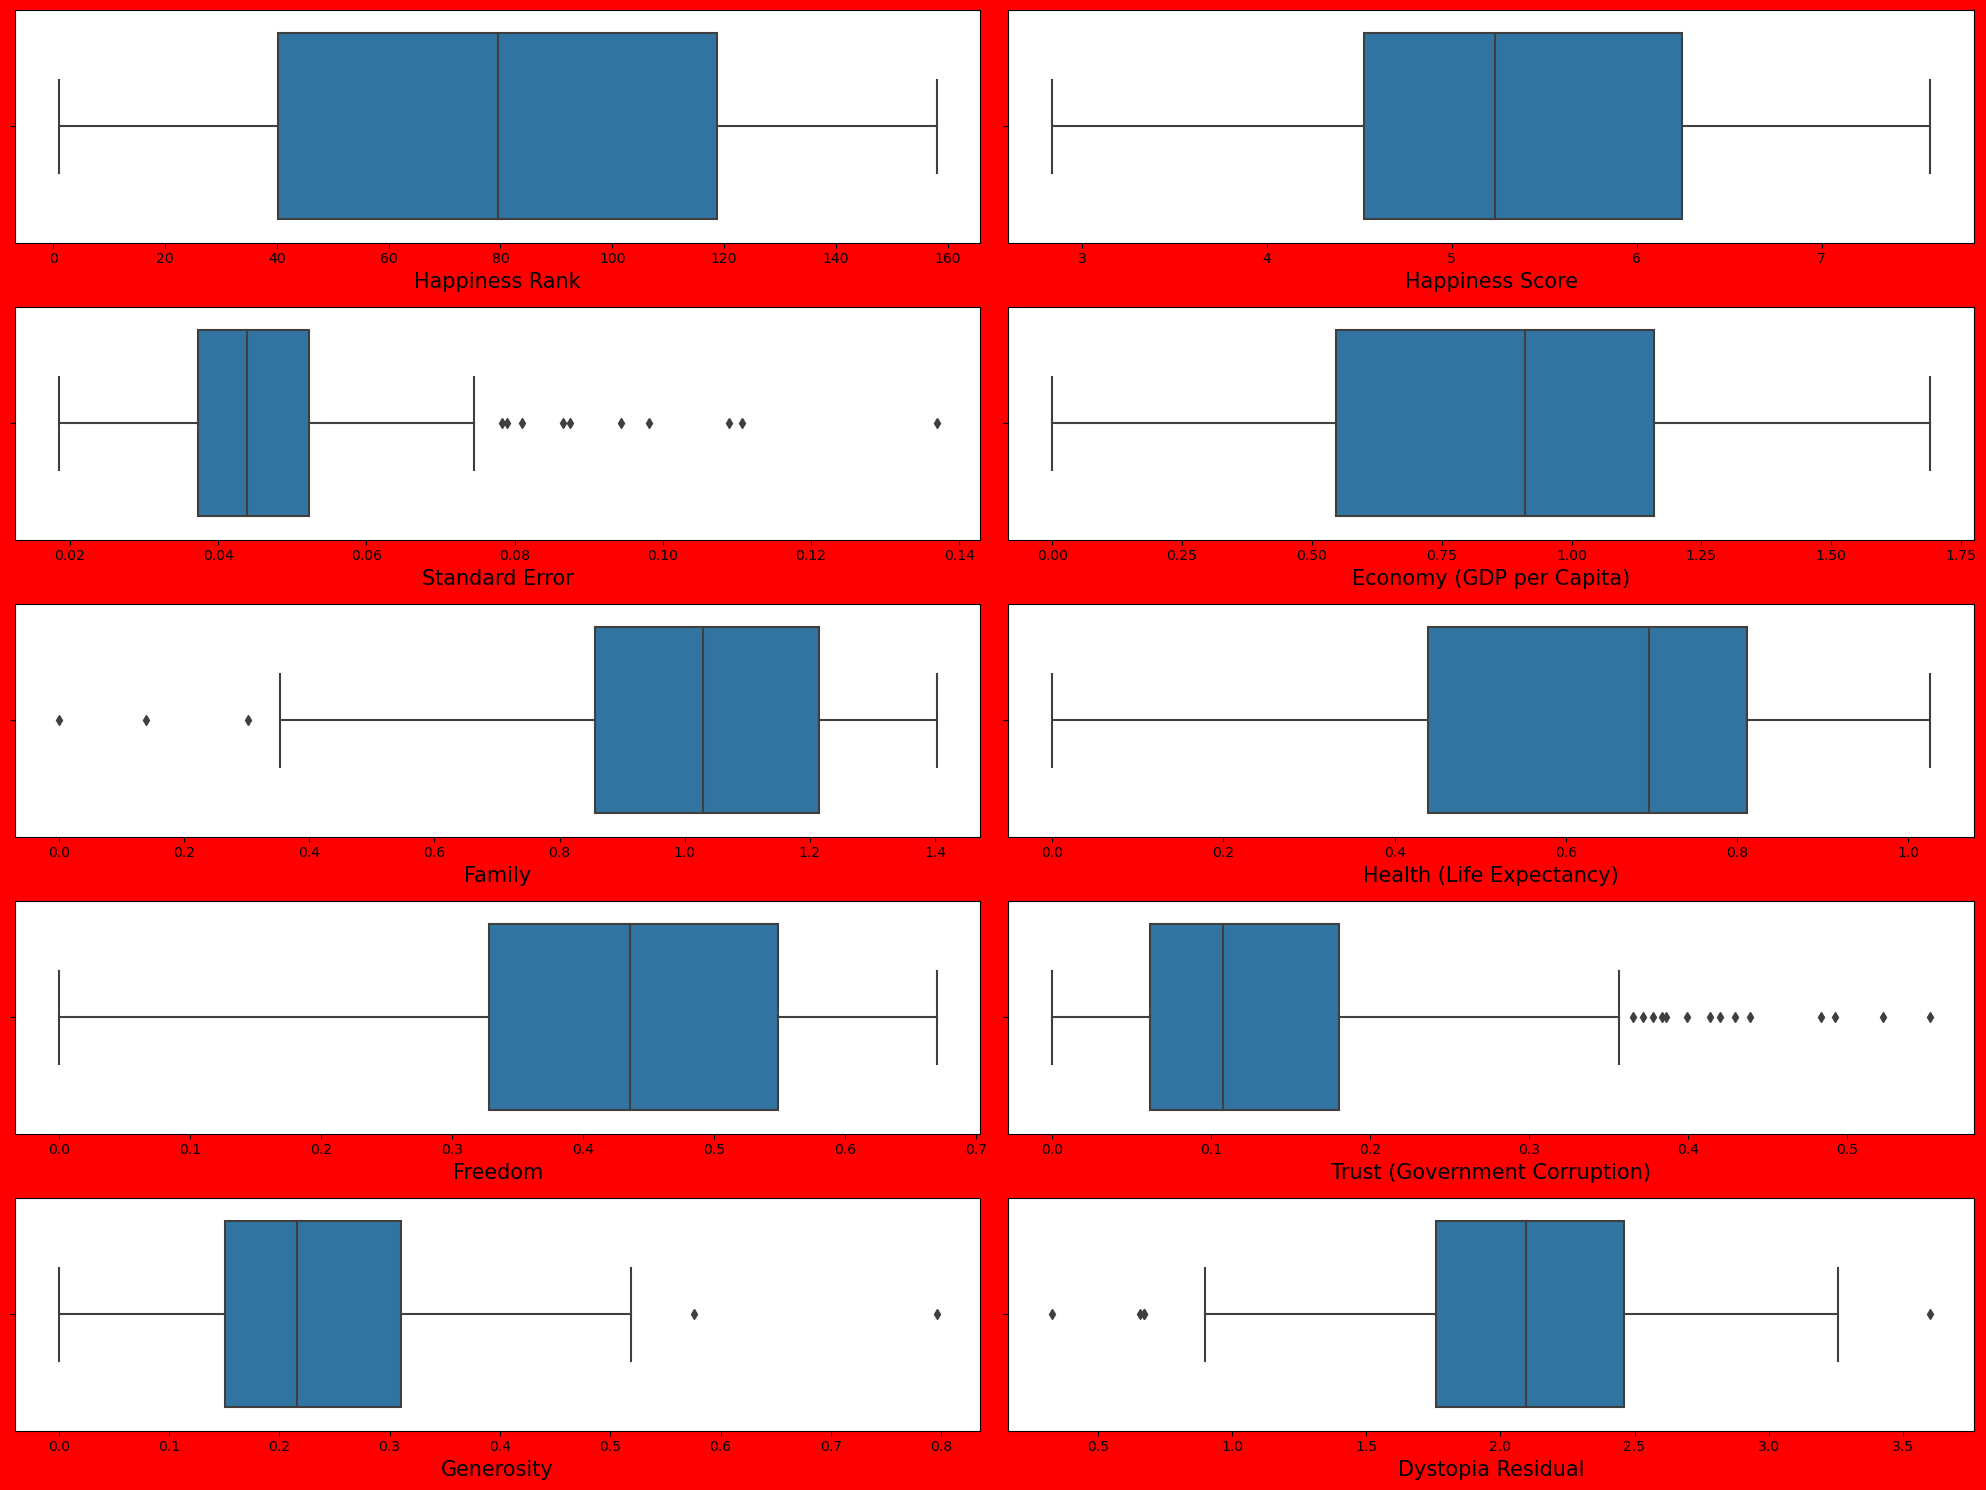

In [26]:
plt.figure(figsize = (20,15),facecolor = 'r')
plotnumber = 1
for column in data:
    if plotnumber <=10:
        ax = plt.subplot(5,2,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.tight_layout()
plt.show()

Here are the outliers in the standard error, family, trust (government corruption), generosity, and dystopia residuals. But I think this outliers will be considerable

# Using One hot encoder

In [27]:
from sklearn.preprocessing import OneHotEncoder
def category_to_column(df, column, prefix=''):
    df_copy = df.copy()
    oe_style = OneHotEncoder()
    oe_results = oe_style.fit_transform(df_copy[[column]])
    name_columns = prefix + oe_style.categories_[0]
    temp = pd.DataFrame(oe_results.toarray(), columns=name_columns, index=df_copy.index)
    df_copy = pd.concat([df_copy, temp], axis=1)
    return df_copy

In [29]:
from sklearn.preprocessing import OneHotEncoder
OHE = OneHotEncoder()

# Used label encoding

In [30]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()

In [34]:
df['Country']=label_encoder.fit_transform(df['Country'])

In [37]:
df['Country']

0      135
1       58
2       37
3      105
4       24
      ... 
153    118
154     13
155    136
156     21
157    141
Name: Country, Length: 158, dtype: int32

# Apply linear regression

In [38]:
from sklearn import linear_model
reg = linear_model.LinearRegression()

In [40]:
X = df.drop(['Country','Region'],axis=1)  #input
y = df['Country']  #output

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [42]:
reg.fit(X_train, y_train)

LinearRegression()

In [43]:
reg.coef_

array([-1.54111733e+00, -1.58672062e+04,  1.73842470e+02,  1.57916824e+04,
        1.58445266e+04,  1.58160597e+04,  1.57774589e+04,  1.58501638e+04,
        1.58410042e+04,  1.58092768e+04])

In [44]:
reg.intercept_

481.27687855119063

In [45]:
y_pred=reg.predict(X_test)

In [46]:
y_pred

array([ 83.53429591,  95.35688746,  55.08566687, 101.32736181,
       114.52502973,  86.77774033,  87.52213269,  82.99749238,
        81.5816355 ,  78.03208702,  86.9805895 , 104.93188523,
        79.64745785,  94.99136464,  85.51839604,  82.41825439,
        71.05831165,  51.86200621, 101.8587222 ,  86.09806639,
        66.19379298,  88.62358594,  74.95987298,  88.63087806,
        94.67333702,  89.47714776,  92.66883982,  71.57878657,
        69.39675892,  72.79362732,  79.225534  ,  91.6657774 ])

In [47]:
accuracy = reg.score(X_test,y_test)
print(accuracy)

0.04932066284192138


# FINDING ERRORS

In [48]:
from sklearn.metrics import mean_absolute_error

In [49]:
mean_absolute_error(y_test, y_pred)

37.877389903501026

In [50]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

2171.2884750193184

In [51]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.04932066284192138

# Ridge Regression

In [52]:
from sklearn import linear_model
reg = linear_model.Ridge(alpha=0.1)
reg.fit(X_train,y_train)

Ridge(alpha=0.1)

In [53]:
print(reg.coef_)

[ -1.46403166 -40.54248746  47.13857972 -31.58666097  19.90318773
  -9.30558999 -38.81180463  19.19457808  16.2163348  -14.58316365]


In [54]:
print(reg.intercept_)

465.3487240144041


In [55]:
accuracy = reg.score(X_test,y_test)
print(accuracy)

0.01140991044821471


# Lasso regression

In [56]:
from sklearn import linear_model
reg = linear_model.Lasso(alpha=0.1)
reg.fit(X_train,y_train)

Lasso(alpha=0.1)

In [57]:
print(reg.coef_)

[ -1.3005184  -41.14989689   0.         -22.45483328  22.1274791
  -0.         -20.1229218   12.31057301  14.49708794  -7.36262733]


In [58]:
print(reg.intercept_)

420.0521594288341


In [59]:
accuracy = reg.score(X_test,y_test)
print(accuracy)

0.003390841536911493
